In [1]:
# import libraries
import os
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import geopy.distance

In [6]:
cd ..

/work-ceph/bizer-tp2021/data_integration_using_deep_learning


In [7]:
# import data
source_path = r"notebooks/Entity/LocalBusiness/Clustering"
#source_path = r"C:\Users\chench10\Downloads" 
file = 'New_Concatenated_MatchingFile'

df = pd.read_json(os.path.join(source_path, file), compression='gzip', orient='records', lines=True) 

In [9]:
df

,row_id,origin,name,address,page_url,telephone,addressregion,streetaddress,addresslocality,addresscountry,longitude,latitude,telephone_,phone_object,E.164 format,telephoneNorm
0,2,LocalBusiness_litmind.com_September2020.json.gz,Salvador Model Agency,"{'postalcode': '28001', 'addresslocality': 'Ma...",https://es.litmind.com/salvadormodelagency,+34 914310707,Madrid,"General Pardiñas, 34. 1º7ª",Madrid,ES,-3.6835849285126,40.423894105042,34914310707,"{'country_code': 34, 'extension': None, 'natio...",34914310707,34914310707
1,10,LocalBusiness_litmind.com_September2020.json.gz,UNIC AZAFATAS S.L,"{'postalcode': '28250', 'addresscountry': 'ES'...",https://es.litmind.com/456459,+34 918599376,Madrid,C/ TORRENCINA 18,TORRELODONES,ES,-3.8939949,40.5808292,34918599376,"{'country_code': 34, 'extension': None, 'natio...",34918599376,34918599376
2,16,LocalBusiness_litmind.com_September2020.json.gz,Coconut,"{'streetaddress': 'Calle Zabaleta, 10', 'addre...",https://es.litmind.com/coconutmadrid/info,+34 913776214,Madrid,"Calle Zabaleta, 10",Madrid,ES,-3.6744062,40.4413414,34913776214,"{'country_code': 34, 'extension': None, 'natio...",34913776214,34913776214
3,18,LocalBusiness_litmind.com_September2020.json.gz,SDA MODEL'S INTERNATIONAL AGENCY,"{'postalcode': '28001', 'addresscountry': 'ES'...",https://es.litmind.com/sdamodelsintagency,+34 640847492,Madrid,ayala madrid n7 bajos,barcelona,ES,-3.6825650000001,40.427645,34640847492,"{'country_code': 34, 'extension': None, 'natio...",34640847492,34640847492
4,20,LocalBusiness_litmind.com_September2020.json.gz,RAMONSERRANOPHOTO,"{'addressregion': 'Badajoz', 'addresslocality'...",https://es.litmind.com/ramonserranophoto-estudio,+34 636540326,Badajoz,"Avd. Constitucion, 2",Villafranca de los Barros,ES,-6.3428955,38.5616549,34636540326,"{'country_code': 34, 'extension': None, 'natio...",34636540326,34636540326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495583,9968,Hotel_ihg.com_September2020.json.gz,None,"{'postalcode': '32608', 'addresslocality': 'Ga...",https://www.ihg.com/destinations/de/de/united-...,1-352-3781300,FLORIDA,3370 S.W. 42nd Street,Gainesville,US,-8.238674639999999E1,2.962221619999999E1,13523781300,"{'country_code': 1, 'extension': None, 'nation...",13523781300,13523781300
1495584,9975,Hotel_ihg.com_September2020.json.gz,None,"{'postalcode': '30150-370', 'addresslocality':...",https://www.ihg.com/holidayinn/destinations/us...,55-31-30646555,None,"Rua Professor Moraes, 600",Belo Horizonte - MG,BR,-4.3931513E1,-1.9938399E1,553130646555,"{'country_code': 55, 'extension': None, 'natio...",553130646555,553130646555
1495585,9977,Hotel_ihg.com_September2020.json.gz,None,"{'postalcode': 'A-9500', 'streetaddress': 'Eur...",https://www.ihg.com/voco/hotels/fr/fr/villach/...,43-4242-22522,None,Europaplatz 1 - 2,Villach,AT,1.384929E1,4.661559E1,43424222522,"{'country_code': 43, 'extension': None, 'natio...",43424222522,43424222522
1495586,9999,Hotel_ihg.com_September2020.json.gz,None,"{'streetaddress': '12217 4th Street', 'address...",https://www.ihg.com/holidayinnexpress/destinat...,1-250-7827700,COLOMBIE BRITANNIQUE,12217 4th Street,Dawson Creek,CA,-1.20216293E2,5.5737782E1,12507827700,"{'country_code': 1, 'extension': None, 'nation...",12507827700,12507827700


In [10]:
df.groupby('origin').size().sort_values(asce)

origin
Hotel_10best.com_September2020.json.gz                   213
Hotel_1589hotels.com_September2020.json.gz                16
Hotel_1stquest.com_September2020.json.gz                 230
Hotel_360degreesgroup.com_September2020.json.gz            2
Hotel_4ehotels.com_September2020.json.gz                   3
                                                        ... 
Restaurant_zenchef.com_September2020.json.gz             239
Restaurant_zenwok-restaurant.fr_September2020.json.gz     38
Restaurant_zhupiter.com_September2020.json.gz              8
Restaurant_zoup.com_September2020.json.gz                 70
Restaurant_zueriplausch.ch_September2020.json.gz           7
Length: 11077, dtype: int64

In [9]:
df_copy = df.copy()

<b> Before cleaning </b> <br>
number of unique tables: 11k <br>
number of unique clusters: 963k

### Cluster Cleaning

In [148]:
df =df_copy.copy()

<b> step 1: </b> Group the data by <i>telephoneNorm</i>, and count the number of tables for each group, keep only the groups with records from at least two tables

In [8]:
tmp = pd.DataFrame(df.groupby('telephoneNorm')['origin'].nunique()).reset_index()
tmp.columns = ['telephoneNorm','Ntables']

In [9]:
df_merge = df.merge(tmp, on='telephoneNorm', how='left')
df1 = df_merge[df_merge['Ntables']>1]
#df1 = df_merge[df_merge['Ntables']>0]
df1.drop(columns='Ntables', inplace=True)

/home/bizer-tp2021/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [12]:
df1['origin'].nunique()

5544

In [ ]:
#df1 = df_merge[df_merge['Ntables']>7].sort_values('Ntables')

<b> After step1 </b> <br>
number of unique tables: 5.5k <br>
number of unique clusters: 72.6k

cluster size >= 8: <br>
number of unique tables: 1.3k <br>
number of unique clusters: 1.3k

<b> step 2: </b> Use more specific address information, e.g., <i>streetaddress</i>, for filtering 

In [10]:
def replace_list(iterator):
    if isinstance(iterator, list):
        return ' '.join(iterator)
    else:
        return iterator

In [13]:
df1['streetaddress']=df1['streetaddress'].apply(replace_list)
df1['addresslocality']=df1['addresslocality'].apply(replace_list)

df1["streetaddress"] = df1["streetaddress"].str.upper()
df1['addresslocality']=df1['addresslocality'].str.upper()

/tmp/ipykernel_644278/3160774378.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['streetaddress']=df1['streetaddress'].apply(replace_list)
/tmp/ipykernel_644278/3160774378.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['addresslocality']=df1['addresslocality'].apply(replace_list)
/tmp/ipykernel_644278/3160774378.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [14]:
tmp1 = pd.DataFrame(df1.groupby('telephoneNorm')['streetaddress'].nunique()).reset_index()
tmp1.columns = ['telephoneNorm','Nstreetaddress']

tmp2 = pd.DataFrame(df1.groupby('telephoneNorm')['addresslocality'].nunique()).reset_index()
tmp2.columns = ['telephoneNorm','Naddresslocality']

In [15]:
df_merge = df1.merge(tmp1, on='telephoneNorm', how='left').merge(tmp2, on='telephoneNorm', how='left')
df2 = df_merge[(df_merge['Nstreetaddress']<=5) & (df_merge['Naddresslocality']<=5)]
df2.drop(columns=['Nstreetaddress','Naddresslocality'], inplace=True)

/home/bizer-tp2021/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [16]:
tmp_ = pd.DataFrame(df2.groupby('telephoneNorm')['origin'].nunique()).reset_index()
tmp_.columns = ['telephoneNorm','Ntables']
df_merge_ = df2.merge(tmp_, on='telephoneNorm', how='left')
df_ = df_merge_[df_merge_['Ntables']>=8]

<b> After step2 </b> <br>
number of unique tables: 5.2k <br>
number of unique clusters: 72.1k

cluster size >= 8: <br>
number of unique tables: 1.04k <br>
number of unique clusters: 1.33k

<b> step 3: </b>  Additional filtering using geo location

The function for calculating distances is credited to Marvin

In [44]:
# def calcDifference(pointOne, pointTwo):
#     return geopy.distance.great_circle(pointOne, pointTwo).km

# def calcDifferenceFromRow (row, data):
#     indexValue = row.indexValue
#     indexPosition = (row[lat], row[lon])
#     diffList = []
# #     for value in row['MatchingGeoPoints']:
# #         if not value in tmp.index:
# #             continue
#     for value in row['MatchingNumbers']:
#         currRow = data.loc[value]
#         currIndex = currRow['indexValue']
#         if currIndex == indexValue:
#             diffList.append(-1)
#         else:            
#             currPosition = (currRow[lat], currRow[lon])
#             diffList.append(calcDifference(indexPosition, currPosition))
#     return diffList


# def keepCloseMatches(row, threshold):
#     return np.array(row['MatchingNumbers'])[np.array(row['distance'])<=threshold]

In [45]:
# lat = 'latitude'
# lon = 'longitude'

# check_list = ['latitude', 'longitude', 'indexValue']
# for l in check_list:
#     df2[l]=df2[l].apply(replace_list)
# df2['distance'] = df2.apply(calcDifferenceFromRow, args=(df2, ), axis=1)

In [46]:
# df2_copy = df2.copy()
# df2['MatchingNumbers_New'] = df2.apply(keepCloseMatches, args=(0.05,), axis=1)

In [47]:
# df2.to_json('df2_backup', compression='gzip', orient='records', lines=True)

### Clusters
#### Cluster Statistics

In [138]:
# class EntityCluster():
#     """
#     create culsters and generate summary statistics for each entity tpye
#     """
    
#     def __init__(self, name, df=None, id_col='telephoneNorm'):
#         self.name = name
#         self.df = df
#         self.id_col = id_col
        
#         self._create_clusters()
        
#     @staticmethod
#     def _helperfunc(iterator, cluster, id_col='telephoneNorm', val_col='MatchingNumbers'):
#         key = iterator[id_col]
#         val = iterator[val_col]
#         cluster[key] = cluster[key].union(set(val))
        
#         return cluster
        
        
#     def _create_clusters(self):
#         """
#         create clusters and use the column value as the cluster identifier
#         """
#         df = self.df
#         id_col = self.id_col
        
#         # intialize the cluster
#         if not df is None:
#             cluster_ids = df[id_col].unique()
#             cluster = {key: set([]) for key in cluster_ids}
#             # add elements to the cluster
#             cluster = df.apply(EntityCluster._helperfunc, args=(cluster,), axis=1)[0]
#         else:
#             cluster = None
        
#         self.cluster = cluster
        
    
#     def get_cluster(self):
#         return self.cluster
                                                                            

#     def create_cluster_statistics(self, *args):
#         cluster = self.cluster
#         # create a dataframe for data storage
#         tmp = {}
#         for key, val in cluster.items():
#             tmp[key] = len(val)
            
#         df_clusters = pd.DataFrame().from_dict(tmp, orient='index', columns=['frequency'])
#         df_clusters.sort_values('frequency', ascending=False, inplace=True)
            
#         return df_clusters['frequency'].describe()
      
    
#     def plot_histogram(self, min_=None, max_=None, bins=None, *args): 
    
#         cluster = self.cluster
#         name =self.name
#         # create a dataframe for data storage
#         tmp = {}
#         for key, val in cluster.items():
#             tmp[key] = len(val)
            
#         df_clusters = pd.DataFrame().from_dict(tmp, orient='index', columns=['frequency'])
#         df_clusters.sort_values('frequency', ascending=False, inplace=True)
        
#         # plot the histogram
#         if min_ is None: 
#             min_ = df_clusters.frequency.quantile(0.95) 
#         if max_ is None: 
#             max_ = df_clusters.frequency.max()
#         if bins is None:
#             bins = int((max_ - min_)/10)
            
#         figure, ax= plt.subplots(figsize=(10,3))
#         subset = df_clusters[(df_clusters.frequency> min_)&(df_clusters.frequency< max_)].frequency
#         xint = range(math.floor(min_), math.ceil(max_)+1)
#         plt.xticks(xint)
#         plt.title(name)
#         plt.xlabel('Cluster Size')
#         plt.hist(subset, bins=bins)

In [140]:
# LocalBusiness = EntityCluster('Local Business', df_filtered)
# cluster_statistics_LB = LocalBusiness.create_cluster_statistics()
# cluster_plot_LB = LocalBusiness.plot_histogram(min_=0, max_=30, bins=30)

In [21]:
cluster_statistics_LB

count    14004.000000
mean         2.892816
std          1.912312
min          2.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: frequency, dtype: float64

#### Distribution of Matching Entities over Tables 

In [33]:
df_filtered = df2.reset_index(drop=True)

In [34]:
# create a dataframe storing cluster ids
numbers = df_filtered['telephoneNorm'].unique()

dict_id = {}
i = 1
for number in numbers:
    dict_id[number] = i
    i += 1

tmp = pd.DataFrame.from_dict(dict_id, orient='index')
tmp.reset_index(inplace=True)
tmp.columns = ['telephoneNorm','cluster_id']

In [35]:
df_clean = df_filtered.merge(tmp, on='telephoneNorm')#[['cluster id','origin','row_id','page_url']]
#df_clean.columns = ['cluster_id','table_id','row_id','page_url']

In [159]:
#df_clean.to_json('MFile_cleaned', compression='gzip', orient='records', lines=True)

In [36]:
df_clean=df_clean.rename(columns={'origin':'table_id'})
df_clean

,row_id,table_id,name,address,page_url,telephone,addressregion,streetaddress,addresslocality,addresscountry,longitude,latitude,telephone_,phone_object,E.164 format,telephoneNorm,Ntables,cluster_id
0,377,LocalBusiness_agfg.com.au_September2020.json.gz,Gin Social,"{'addresscountry': 'AU', 'streetaddress': '34 ...",https://www.agfg.com.au/bar/gin-social-68249,(07) 4050 2000,Tropical North Queensland,34 ESPLANADE,CAIRNS,AU,145.780203600000000,-16.922920800000000,740502000,"{'country_code': 61, 'extension': None, 'natio...",61740502000,61740502000,8,1
1,1206,LocalBusiness_australias.guide_September2020.j...,Hilton Cairns,"{'addresscountry': 'AU', 'streetaddress': '34 ...",https://www.australias.guide/qld/accommodation...,07 40502000,Queensland,34 ESPLANADE,CAIRNS,AU,145.7802036,-16.9229208,740502000,"{'country_code': 61, 'extension': None, 'natio...",61740502000,61740502000,8,1
2,180,Hotel_kayak.com.au_September2020.json.gz,Hilton Cairns,"{'streetaddress': '34 Esplanade', 'addresscoun...",https://www.kayak.com.au/Cairns-Hotels.23637.h...,+61 740 502 000,Queensland,34 ESPLANADE,CAIRNS,AU,None,None,61740502000,"{'country_code': 61, 'extension': None, 'natio...",61740502000,61740502000,8,1
3,152,Hotel_accommodationairliebeach.com_September20...,Hilton Cairns Accommodation Airlie Beach,"{'streetaddress': '34 Esplanade, Cairns QLD 48...",https://www.accommodationairliebeach.com/accom...,07 4050 2000,QLD,"34 ESPLANADE, CAIRNS QLD 4870, AUSTRALIA",34 ESPLANADE,AU,None,None,740502000,"{'country_code': 61, 'extension': None, 'natio...",61740502000,61740502000,8,1
4,887,Hotel_yambaaccommodation.com_September2020.jso...,Hilton Cairns Yamba Accommodation,"{'streetaddress': '34 Esplanade, Cairns QLD 48...",https://www.yambaaccommodation.com/accommodati...,07 4050 2000,QLD,"34 ESPLANADE, CAIRNS QLD 4870, AUSTRALIA",34 ESPLANADE,AU,None,None,740502000,"{'country_code': 61, 'extension': None, 'natio...",61740502000,61740502000,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18043,31692,Hotel_kayak.com_September2020.json.gz,Sheraton Miyako Hotel Osaka,"{'addresscountry': 'Japan', 'postalcode': '543...",https://www.za.kayak.com/Amagasaki-Hotels.2246...,+81 667 731 111,Osaka Prefecture,6-1-55 UEHOMMACHI,OSAKA,JP,None,None,81667731111,"{'country_code': 81, 'extension': None, 'natio...",81667731111,81667731111,8,1330
18044,3539,Hotel_marriott.co.uk_September2020.json.gz,Sheraton Miyako Hotel Osaka,"{'postalcode': '543-0001', 'streetaddress': '6...",https://www.marriott.co.uk/hotels/travel/osays...,+81 6-6773-1111,None,"6-1-55, UEHONMACHI, TENNOJI-KU",OSAKA,JP,1.35520326E2,3.4665504E1,81667731111,"{'country_code': 81, 'extension': None, 'natio...",81667731111,81667731111,8,1330
18045,4519,Hotel_hotelscombined.com_September2020.json.gz,Sheraton Miyako Hotel Osaka,"{'addresscountry': 'Japan', 'postalcode': '543...",https://www.hotelscombined.com/Hotel/Sheraton_...,+81 667 731 111,Osaka Prefecture,6-1-55 UEHOMMACHI,OSAKA,JP,None,None,81667731111,"{'country_code': 81, 'extension': None, 'natio...",81667731111,81667731111,8,1330
18046,9797,Hotel_marriott.com_September2020.json.gz,Sheraton Miyako Hotel Osaka,"{'postalcode': '543-0001', 'streetaddress': '6...",https://www.marriott.com/hotels/travel/osays-s...,+81 6-6773-1111,None,"6-1-55, UEHONMACHI, TENNOJI-KU",OSAKA,JP,1.35520326E2,3.4665504E1,81667731111,"{'country_code': 81, 'extension': None, 'natio...",81667731111,81667731111,8,1330


In [32]:
df_

,row_id,origin,name,address,page_url,telephone,addressregion,streetaddress,addresslocality,addresscountry,longitude,latitude,telephone_,phone_object,E.164 format,telephoneNorm,Ntables
86,377,LocalBusiness_agfg.com.au_September2020.json.gz,Gin Social,"{'addresscountry': 'AU', 'streetaddress': '34 ...",https://www.agfg.com.au/bar/gin-social-68249,(07) 4050 2000,Tropical North Queensland,34 ESPLANADE,CAIRNS,AU,145.780203600000000,-16.922920800000000,740502000,"{'country_code': 61, 'extension': None, 'natio...",61740502000,61740502000,8
167,1010,LocalBusiness_agfg.com.au_September2020.json.gz,The Island Rooftop,"{'postalcode': '4217', 'addresscountry': 'AU',...",https://www.agfg.com.au/bar/the-island-rooftop...,(07) 5538 8000,Gold Coast,"ISLAND RESORT, CNR SURFERS PARADISE BOULEVARDE...",SURFERS PARADISE,AU,153.428355753421780,-28.002948530354390,755388000,"{'country_code': 61, 'extension': None, 'natio...",61755388000,61755388000,8
260,0,LocalBusiness_visitthy.com_September2020.json.gz,Brænderiet Limfjorden - distillery,"{'streetaddress': 'Sundsørevej 4 null', 'posta...",https://www.visitthy.com/thy/plan-your-trip/br...,40940000,None,SUNDSØREVEJ 4 NULL,ROSLEV,DK,9.17321563E0,5.670806848E1,40940000,"{'country_code': 45, 'extension': None, 'natio...",4540940000,4540940000,10
296,73,LocalBusiness_visitthy.com_September2020.json.gz,Brænderiet Limfjorden,"{'postalcode': '7870', 'addresscountry': 'DK',...",https://www.visitthy.com/thy/plan-your-trip/br...,+45 40 94 00 00,None,SUNDSØREVEJ 4 SUNDSØRE HAVN,ROSLEV,DK,9.17325139045715E0,5.67080333615004E1,4540940000,"{'country_code': 45, 'extension': None, 'natio...",4540940000,4540940000,10
306,5,LocalBusiness_theecostrip.com_September2020.js...,Urquid Linen,"{'addresscountry': 'US', 'addressregion': 'CA'...",http://www.theecostrip.com/Ugw6H.html,323.231.9012,CA,739 E 60TH ST.,LOS ANGELES,US,None,None,3232319012,"{'country_code': 1, 'extension': None, 'nation...",13232319012,13232319012,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
247002,3385,Hotel_ihg.com_September2020.json.gz,Hotel Indigo Lower East Side New York,"{'addresslocality': 'New York', 'addresscountr...",https://www.ihg.com/hotels/jp/ja/new-york/nyco...,1 212 2371776,", New York",None,NEW YORK,US,-73.987838,40.721754,12122371776,"{'country_code': 1, 'extension': None, 'nation...",12122371776,12122371776,9
247075,3900,Hotel_ihg.com_September2020.json.gz,Holiday Inn Manhattan-Financial District,"{'postalcode': '10006', 'addresslocality': 'Ne...",https://www.ihg.com/holidayinn/hotels/us/en/ne...,1-212-7912900,", New York",None,NEW YORK,US,-74.014323,40.708308,12127912900,"{'country_code': 1, 'extension': None, 'nation...",12127912900,12127912900,11
247268,5245,Hotel_ihg.com_September2020.json.gz,Holiday Inn Pattaya,"{'name': 'Holiday Inn Pattaya', 'addresslocali...",https://www.ihg.com/holidayinn/hotels/us/en/pa...,66-38-725555,None,None,PATTAYA,TH,100.885005,12.94852,6638725555,"{'country_code': 66, 'extension': None, 'natio...",6638725555,6638725555,8
247440,6453,Hotel_ihg.com_September2020.json.gz,Holiday Inn Pattaya,"{'name': 'Holiday Inn Pattaya', 'addresslocali...",https://www.ihg.com/holidayinn/hotels/us/en/pa...,66-38-725555,None,None,PATTAYA,TH,100.885005,12.94852,6638725555,"{'country_code': 66, 'extension': None, 'natio...",6638725555,6638725555,8


In [37]:
tmp = pd.DataFrame(df_clean.groupby(['cluster_id'])['table_id'].nunique()).reset_index()
tmp.columns = ['cluster_id','clusterNtables']
df_final = df_clean.merge(tmp, on='cluster_id', how='left')

In [38]:
tmp = pd.DataFrame(df_final.groupby(['table_id'])['cluster_id'].nunique()).reset_index()
tmp.columns = ['table_id','tableNclusters']
df_final = df_final.merge(tmp, on='table_id', how='left').sort_values(by='tableNclusters', ascending=False)

In [47]:
df_final.sort_values('clusterNtables')

,row_id,table_id,name,address,page_url,telephone,addressregion,streetaddress,addresslocality,addresscountry,longitude,latitude,telephone_,phone_object,E.164 format,telephoneNorm,Ntables,cluster_id,clusterNtables,tableNclusters
11675,0,LocalBusiness_duandang.icu_September2020.json.gz,Gemalto (Thailand) Ltd,"{'addresslocality': 'Bangkok', 'postalcode': '...",http://www.duandang.icu/companyinfo/offices-lo...,02 018 3579,None,"SJ INFINITE ONE BUSINESS COMPLEX, 20TH FLOOR, ...",BANGKOK,TH,100.559221,13.8096,20183579,"{'country_code': 66, 'extension': None, 'natio...",6620183579,6620183579,8,844,8,5
17918,202,Hotel_dayuse.com_September2020.json.gz,London Marriott Hotel County Hall,"{'addresslocality': 'Greater London', 'address...",https://au.dayuse.com/hotels/united-kingdom/lo...,+4402079285200,None,None,GREATER LONDON,GB,None,None,4402079285200,"{'country_code': 44, 'extension': None, 'natio...",442079285200,442079285200,8,1318,8,45
17919,412,Hotel_dayuse.com_September2020.json.gz,London Marriott Hotel County Hall,"{'addresslocality': 'Greater London', 'address...",https://bh.dayuse.com/hotels/united-kingdom/lo...,+4402079285200,None,None,GREATER LONDON,GB,None,None,4402079285200,"{'country_code': 44, 'extension': None, 'natio...",442079285200,442079285200,8,1318,8,45
14069,652,LocalBusiness_homify.sg_September2020.json.gz,Paper Moon,"{'addresscountry': 'United Kingdom', 'streetad...",https://www.homify.sg/projects/63600/room-seve...,+44-2074584548,None,SUITE 444 571 FINCHLEY ROAD,LONDON,GB,-1.786528E-1,5.15460394E1,442074584548,"{'country_code': 44, 'extension': None, 'natio...",442074584548,442074584548,8,1078,8,139
13881,560,LocalBusiness_homify.sg_September2020.json.gz,Departamento Seis,"{'addresscountry': 'Mexico', 'postalcode': '03...",https://www.homify.sg/projects/406039/escritor...,+52-15570744887,None,FERNANDO MONTES DE OCA,"MÉXICO, D.F.",MX,-9.91427296E1,1.93829461E1,5215570744887,"{'country_code': 52, 'extension': None, 'natio...",525570744887,525570744887,8,1058,8,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2218,28,LocalBusiness_insurancebrokersnearme.com.au_Se...,Insurance Brokers Near Me,"{'postalcode': '4217', 'addresscountry': 'AU',...",https://insurancebrokersnearme.com.au/toowoomba,1300 032 861,QLD,89 EDINBURGH ROAD,BENOWA,AU,1.51857E2,-2.75736E1,1300032861,"{'country_code': 61, 'extension': None, 'natio...",611300032861,611300032861,69,6,69,1
2219,29,LocalBusiness_insurancebrokersnearme.com.au_Se...,Insurance Brokers Near Me,"{'postalcode': '4217', 'addresscountry': 'AU',...",https://insurancebrokersnearme.com.au/brisbane,1300 032 861,QLD,89 EDINBURGH ROAD,BENOWA,AU,1.52712E2,-2.73819E1,1300032861,"{'country_code': 61, 'extension': None, 'natio...",611300032861,611300032861,69,6,69,1
2220,30,LocalBusiness_insurancebrokersnearme.com.au_Se...,Insurance Brokers Near Me,"{'postalcode': '4217', 'addresscountry': 'AU',...",https://insurancebrokersnearme.com.au/milduraw...,1300 032 861,QLD,89 EDINBURGH ROAD,BENOWA,AU,1.4114E2,-3.43505E1,1300032861,"{'country_code': 61, 'extension': None, 'natio...",611300032861,611300032861,69,6,69,1
2222,32,LocalBusiness_insurancebrokersnearme.com.au_Se...,Insurance Brokers Near Me,"{'postalcode': '4217', 'addresscountry': 'AU',...",https://insurancebrokersnearme.com.au/adelaide,1300 032 861,QLD,89 EDINBURGH ROAD,BENOWA,AU,1.3833E2,-3.50004E1,1300032861,"{'country_code': 61, 'extension': None, 'natio...",611300032861,611300032861,69,6,69,1


In [166]:
df_final.to_json('MFile_cleaned_withLBname_new', compression='gzip', orient='records', lines=True)

/tmp/ipykernel_644278/4064157574.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_cluster =df_final.drop_duplicates('cluster_id', keep='first')[df_final['clusterNtables']>=8]


Text(0, 0.5, 'number of clusters')

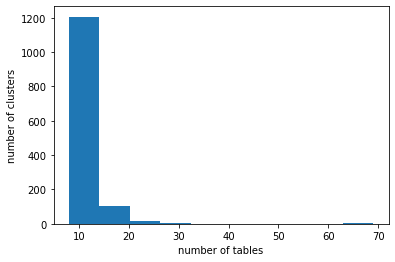

In [48]:
unique_cluster =df_final.drop_duplicates('cluster_id', keep='first')[df_final['clusterNtables']>=8]
plt.hist(unique_cluster['clusterNtables'], bins=10)
plt.xlabel('number of tables')
plt.ylabel('number of clusters')

/tmp/ipykernel_644278/927170451.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  unique_table =df_final.drop_duplicates('table_id', keep='first')[df_final['clusterNtables']>=8][['table_id', 'tableNclusters']]


Text(0, 0.5, 'number of tables')

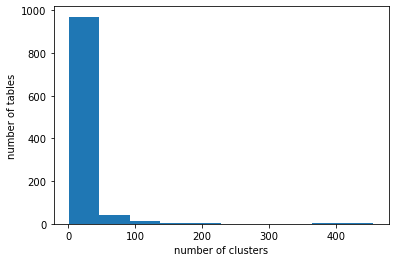

In [49]:
unique_table =df_final.drop_duplicates('table_id', keep='first')[df_final['clusterNtables']>=8][['table_id', 'tableNclusters']]

plt.hist(unique_table['tableNclusters'])
plt.xlabel('number of clusters')
plt.ylabel('number of tables')

In [169]:
unique_table[:35]

,table_id,tableNclusters
239198,Hotel_kayak.com_September2020.json.gz,6618
231065,Hotel_marriott.com_September2020.json.gz,4915
245724,Hotel_marriott.co.uk_September2020.json.gz,4040
51606,Hotel_hotelscombined.com_September2020.json.gz,3603
240916,Hotel_marriott.com.au_September2020.json.gz,3230
196271,Restaurant_bookatable.com_September2020.json.gz,3055
183511,Restaurant_bookatable.co.uk_September2020.json.gz,2860
95819,Restaurant_opentable.com_September2020.json.gz,2462
238238,Hotel_dayuse.com_September2020.json.gz,1632
197682,Restaurant_ubereats.com_September2020.json.gz,1524
